In [12]:
import dress
import numpy as np
import matplotlib.pyplot as plt
import NeSST as nst

In [23]:
reaction = dress.reactions.DTNHe4Reaction()
spec_calc = dress.SpectrumCalculator(reaction, n_samples=1e7)
T_arr = np.linspace(0.5,30.0,20)

In [24]:
dress_σv = []
dress_mean = []
dress_var = []
for T in T_arr:

    dist_a = dress.dists.MaxwellianDistribution(T, spec_calc.reactant_a.particle)
    dist_b = dress.dists.MaxwellianDistribution(T, spec_calc.reactant_b.particle)

    spec_calc.reactant_a.v = dist_a.sample(spec_calc.n_samples)
    spec_calc.reactant_b.v = dist_b.sample(spec_calc.n_samples)

    spectrum, bin_centers = spec_calc()
    σv = 4*np.pi*spectrum.sum()
    mean = np.average(bin_centers,weights=spectrum)
    var = np.average((bin_centers-mean)**2,weights=spectrum)

    dress_σv.append(σv)
    dress_mean.append(mean)
    dress_var.append(var)

C:\Users\Aidan Crilly\AppData\Roaming\Python\Python39\site-packages\dress-1.0-py3.9.egg\dress\reactions\d_t_n_he4_reaction.py:54: RuntimeWarning: overflow encountered in exp


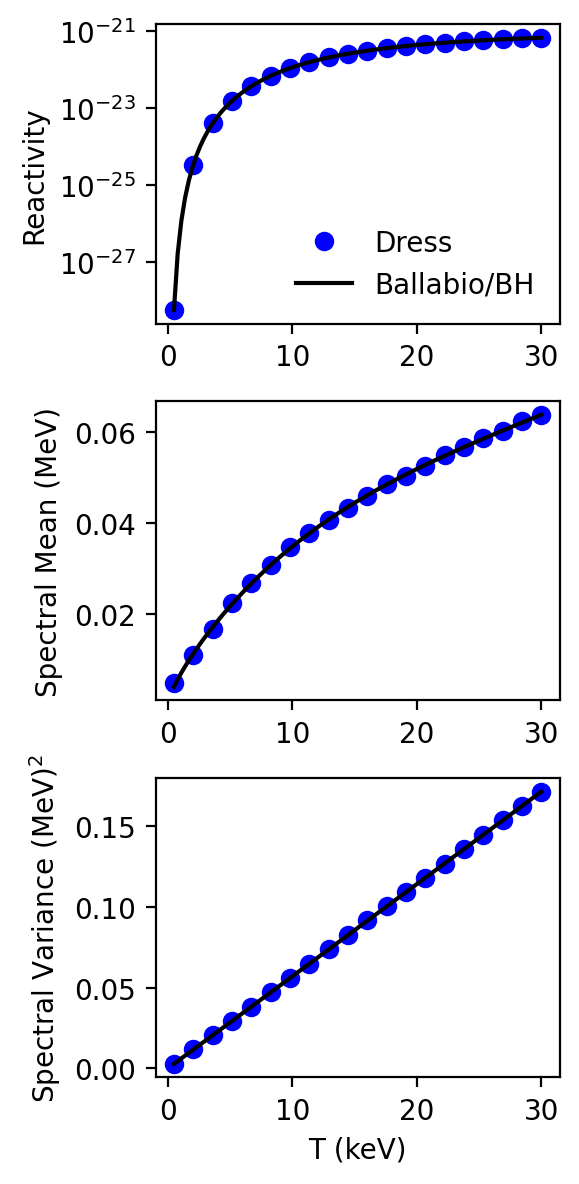

In [32]:
dress_σv = np.array(dress_σv)
dress_mean = np.array(dress_mean)
dress_var = np.array(dress_var)

fig = plt.figure(dpi=200,figsize=(3,6))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ax1.semilogy(T_arr,dress_σv,'bo',label='Dress')
ax2.plot(T_arr,dress_mean/1e3-14.0284,'bo')
ax3.plot(T_arr,dress_var/1e6,'bo')
    
T_plot = np.linspace(T_arr[0],T_arr[-1],100)
mean,var = nst.DTprimspecmoments(T_plot)
ax1.plot(T_plot,nst.sm.reac_DT(T_plot),'k',label='Ballabio/BH')
ax2.plot(T_plot,mean-14.021,'k')
ax3.plot(T_plot,var,'k')
    
ax1.legend(frameon=False)
    
ax1.set_ylabel("Reactivity")
ax2.set_ylabel("Spectral Mean (MeV)")
ax3.set_ylabel(r"Spectral Variance (MeV)$^2$")
ax3.set_xlabel("T (keV)")
    
fig.tight_layout()

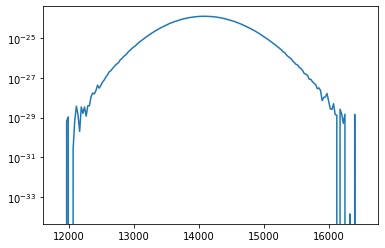

In [35]:
plt.semilogy(bin_centers,spectrum)